In [1]:
import re

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

In [2]:
from deepset_mcp.benchmark.dp_validation_error_analysis.preprocessing_utils import add_error_class_column

In [3]:
df = pd.read_csv("../../../../data/raw/metabase_validation_errors_last_3_months_exported_28-05-2025.csv")

In [4]:
len(df)

8190

In [5]:
df = df.drop(columns=["Context Library Name", "Context Library Version", "Event", "Received At", "UUID Ts", "Timestamp", "Sent At", "Deepset Cloud Version", "Is External User"])

In [6]:
df.head()

,ID,Pipeline Name,Source,User ID,Event Text,Organization Name,Deepset User,Original Timestamp,Workspace Name,Workspace ID,Deepset Orga,Organization ID,Error,Pipeline ID,Organization Type,User Email,Environment
0,7e3eb74b-4ded-4a17-80ea-86289fd0345f,NaN,deepset-cloud-ui,773bd889-4b96-4367-ad44-61d7aabb619b,pipeline validation failed,FCAS,True,"April 30, 2025, 1:00 PM",playground,37510c13-86d7-45ae-8512-a6b59edcd5e1,False,da0a2cb1-abf8-4b4b-810c-d46e6b126df6,There are configuration errors in the 'Deepset...,NaN,FULL_DEEPSET_CLOUD,robin.loebbert@deepset.ai,prod
1,852b1507-70d5-47c9-91a2-17b7765258ab,NaN,deepset-cloud-ui,773bd889-4b96-4367-ad44-61d7aabb619b,pipeline validation failed,FCAS,True,"April 30, 2025, 1:03 PM",playground,37510c13-86d7-45ae-8512-a6b59edcd5e1,False,da0a2cb1-abf8-4b4b-810c-d46e6b126df6,There are configuration errors in the 'Deepset...,NaN,FULL_DEEPSET_CLOUD,robin.loebbert@deepset.ai,prod
2,dde9629d-2fd9-44e4-a8d3-f8b99e76073e,NaN,deepset-cloud-ui,1cc2a113-080c-44d9-a9f2-136c46849a82,pipeline validation failed,ypulse,True,"February 16, 2025, 6:21 PM",staging,957eccec-a149-4666-ad85-88f4c01bc714,False,dfe87923-9a4d-4903-a68d-8a92e3f85a4c,There are configuration errors in the 'article...,NaN,FULL_DEEPSET_CLOUD,mohamed.sriha+ypulse@deepset.ai,prod
3,e3703e55-159a-4abd-a543-04d53c4f37e1,NaN,deepset-cloud-ui,1cc2a113-080c-44d9-a9f2-136c46849a82,pipeline validation failed,ypulse,True,"February 16, 2025, 6:17 PM",staging,957eccec-a149-4666-ad85-88f4c01bc714,False,dfe87923-9a4d-4903-a68d-8a92e3f85a4c,There are configuration errors in the 'article...,NaN,FULL_DEEPSET_CLOUD,mohamed.sriha+ypulse@deepset.ai,prod
4,4c416ec0-ff17-42ba-8974-0af58d93e722,NaN,deepset-cloud-ui,1cc2a113-080c-44d9-a9f2-136c46849a82,pipeline validation failed,ypulse,True,"February 21, 2025, 3:55 AM",staging,957eccec-a149-4666-ad85-88f4c01bc714,False,dfe87923-9a4d-4903-a68d-8a92e3f85a4c,There are configuration errors in the 'consoli...,NaN,FULL_DEEPSET_CLOUD,mohamed.sriha+ypulse@deepset.ai,prod


In [7]:
df = df.rename(columns={"ID": "event_id", "Pipeline Name": "pipeline_name", "Source": "event_source", "User ID": "user_id", "Event Text": "event_text", "Organization Name": "organization_name", "Deepset User": "is_deepset_user", "Deepset Orga": "is_deepset_org", "Original Timestamp": "event_timestamp", "Workspace Name": "workspace_name", "Workspace ID": "workspace_id", "Organization ID": "organization_id", "Error": "error_message", "Organization Type": "organization_type", "User Email": "user_email", "Environment": "environment", "Pipeline ID": "pipeline_id"})

In [8]:
df.head()

,event_id,pipeline_name,event_source,user_id,event_text,organization_name,is_deepset_user,event_timestamp,workspace_name,workspace_id,is_deepset_org,organization_id,error_message,pipeline_id,organization_type,user_email,environment
0,7e3eb74b-4ded-4a17-80ea-86289fd0345f,NaN,deepset-cloud-ui,773bd889-4b96-4367-ad44-61d7aabb619b,pipeline validation failed,FCAS,True,"April 30, 2025, 1:00 PM",playground,37510c13-86d7-45ae-8512-a6b59edcd5e1,False,da0a2cb1-abf8-4b4b-810c-d46e6b126df6,There are configuration errors in the 'Deepset...,NaN,FULL_DEEPSET_CLOUD,robin.loebbert@deepset.ai,prod
1,852b1507-70d5-47c9-91a2-17b7765258ab,NaN,deepset-cloud-ui,773bd889-4b96-4367-ad44-61d7aabb619b,pipeline validation failed,FCAS,True,"April 30, 2025, 1:03 PM",playground,37510c13-86d7-45ae-8512-a6b59edcd5e1,False,da0a2cb1-abf8-4b4b-810c-d46e6b126df6,There are configuration errors in the 'Deepset...,NaN,FULL_DEEPSET_CLOUD,robin.loebbert@deepset.ai,prod
2,dde9629d-2fd9-44e4-a8d3-f8b99e76073e,NaN,deepset-cloud-ui,1cc2a113-080c-44d9-a9f2-136c46849a82,pipeline validation failed,ypulse,True,"February 16, 2025, 6:21 PM",staging,957eccec-a149-4666-ad85-88f4c01bc714,False,dfe87923-9a4d-4903-a68d-8a92e3f85a4c,There are configuration errors in the 'article...,NaN,FULL_DEEPSET_CLOUD,mohamed.sriha+ypulse@deepset.ai,prod
3,e3703e55-159a-4abd-a543-04d53c4f37e1,NaN,deepset-cloud-ui,1cc2a113-080c-44d9-a9f2-136c46849a82,pipeline validation failed,ypulse,True,"February 16, 2025, 6:17 PM",staging,957eccec-a149-4666-ad85-88f4c01bc714,False,dfe87923-9a4d-4903-a68d-8a92e3f85a4c,There are configuration errors in the 'article...,NaN,FULL_DEEPSET_CLOUD,mohamed.sriha+ypulse@deepset.ai,prod
4,4c416ec0-ff17-42ba-8974-0af58d93e722,NaN,deepset-cloud-ui,1cc2a113-080c-44d9-a9f2-136c46849a82,pipeline validation failed,ypulse,True,"February 21, 2025, 3:55 AM",staging,957eccec-a149-4666-ad85-88f4c01bc714,False,dfe87923-9a4d-4903-a68d-8a92e3f85a4c,There are configuration errors in the 'consoli...,NaN,FULL_DEEPSET_CLOUD,mohamed.sriha+ypulse@deepset.ai,prod


In [9]:
df = add_error_class_column(df)

In [10]:
df.error_class.value_counts()

error_class
custom_components               1362
pipeline_connections            1054
templating                       708
pipeline_inputs_outputs          706
credentials                      633
embeddings                       630
other                            543
not_available                    474
index_inputs_outputs             441
wrong_init_param                 421
not_imported                     329
component_not_found              253
document_store_configuration     240
serialization                    116
component_type_missing            89
tools                             71
models                            66
missing_packages                  32
component_device                  22
Name: count, dtype: int64

In [11]:
# Add component types
df['component_type'] = df['error_message'].str.extract(
    r"component of type ['\"']([^'\"]+)['\"']",
    expand=False
)

In [12]:
df.component_type.value_counts()

component_type
DocumentWriter               214
ChatPromptBuilder            174
Agent                        119
PromptBuilder                111
AnswerBuilderBranchJoiner    106
                            ... 
authorSorterThemenseiten       1
DeepsetRegexParser             1
CSVDocumentCleaner             1
MetaFieldGroupingChunker       1
injectionChecker               1
Name: count, Length: 99, dtype: int64

In [13]:
df['config_error_message'] = df['error_message'].str.extract(
    r"Error:\s*`?([^`\n]+)`?",
    flags=re.IGNORECASE,
    expand=False
)

In [14]:
df.head()

,event_id,pipeline_name,event_source,user_id,event_text,organization_name,is_deepset_user,event_timestamp,workspace_name,workspace_id,is_deepset_org,organization_id,error_message,pipeline_id,organization_type,user_email,environment,error_class,component_type,config_error_message
0,7e3eb74b-4ded-4a17-80ea-86289fd0345f,NaN,deepset-cloud-ui,773bd889-4b96-4367-ad44-61d7aabb619b,pipeline validation failed,FCAS,True,"April 30, 2025, 1:00 PM",playground,37510c13-86d7-45ae-8512-a6b59edcd5e1,False,da0a2cb1-abf8-4b4b-810c-d46e6b126df6,There are configuration errors in the 'Deepset...,NaN,FULL_DEEPSET_CLOUD,robin.loebbert@deepset.ai,prod,custom_components,DeepsetOpenAIVisionChatGenerator,OpenAIChatGenerator.__init__() got an unexpect...
1,852b1507-70d5-47c9-91a2-17b7765258ab,NaN,deepset-cloud-ui,773bd889-4b96-4367-ad44-61d7aabb619b,pipeline validation failed,FCAS,True,"April 30, 2025, 1:03 PM",playground,37510c13-86d7-45ae-8512-a6b59edcd5e1,False,da0a2cb1-abf8-4b4b-810c-d46e6b126df6,There are configuration errors in the 'Deepset...,NaN,FULL_DEEPSET_CLOUD,robin.loebbert@deepset.ai,prod,custom_components,DeepsetOpenAIVisionChatGenerator,OpenAIChatGenerator.__init__() got an unexpect...
2,dde9629d-2fd9-44e4-a8d3-f8b99e76073e,NaN,deepset-cloud-ui,1cc2a113-080c-44d9-a9f2-136c46849a82,pipeline validation failed,ypulse,True,"February 16, 2025, 6:21 PM",staging,957eccec-a149-4666-ad85-88f4c01bc714,False,dfe87923-9a4d-4903-a68d-8a92e3f85a4c,There are configuration errors in the 'article...,NaN,FULL_DEEPSET_CLOUD,mohamed.sriha+ypulse@deepset.ai,prod,templating,PromptBuilder,unexpected '%'
3,e3703e55-159a-4abd-a543-04d53c4f37e1,NaN,deepset-cloud-ui,1cc2a113-080c-44d9-a9f2-136c46849a82,pipeline validation failed,ypulse,True,"February 16, 2025, 6:17 PM",staging,957eccec-a149-4666-ad85-88f4c01bc714,False,dfe87923-9a4d-4903-a68d-8a92e3f85a4c,There are configuration errors in the 'article...,NaN,FULL_DEEPSET_CLOUD,mohamed.sriha+ypulse@deepset.ai,prod,templating,PromptBuilder,unexpected '%'
4,4c416ec0-ff17-42ba-8974-0af58d93e722,NaN,deepset-cloud-ui,1cc2a113-080c-44d9-a9f2-136c46849a82,pipeline validation failed,ypulse,True,"February 21, 2025, 3:55 AM",staging,957eccec-a149-4666-ad85-88f4c01bc714,False,dfe87923-9a4d-4903-a68d-8a92e3f85a4c,There are configuration errors in the 'consoli...,NaN,FULL_DEEPSET_CLOUD,mohamed.sriha+ypulse@deepset.ai,prod,templating,PromptBuilder,No filter named 'dict_items'.


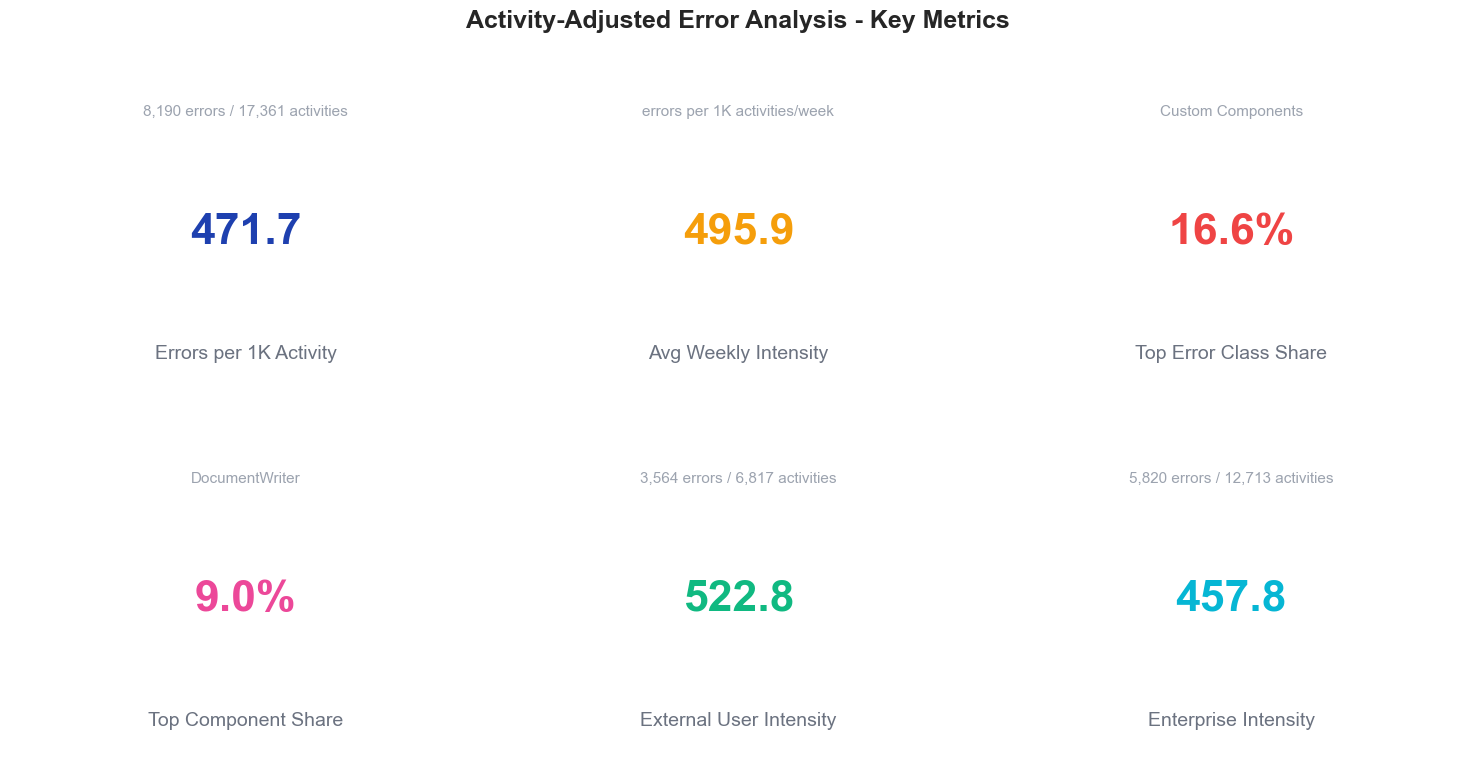

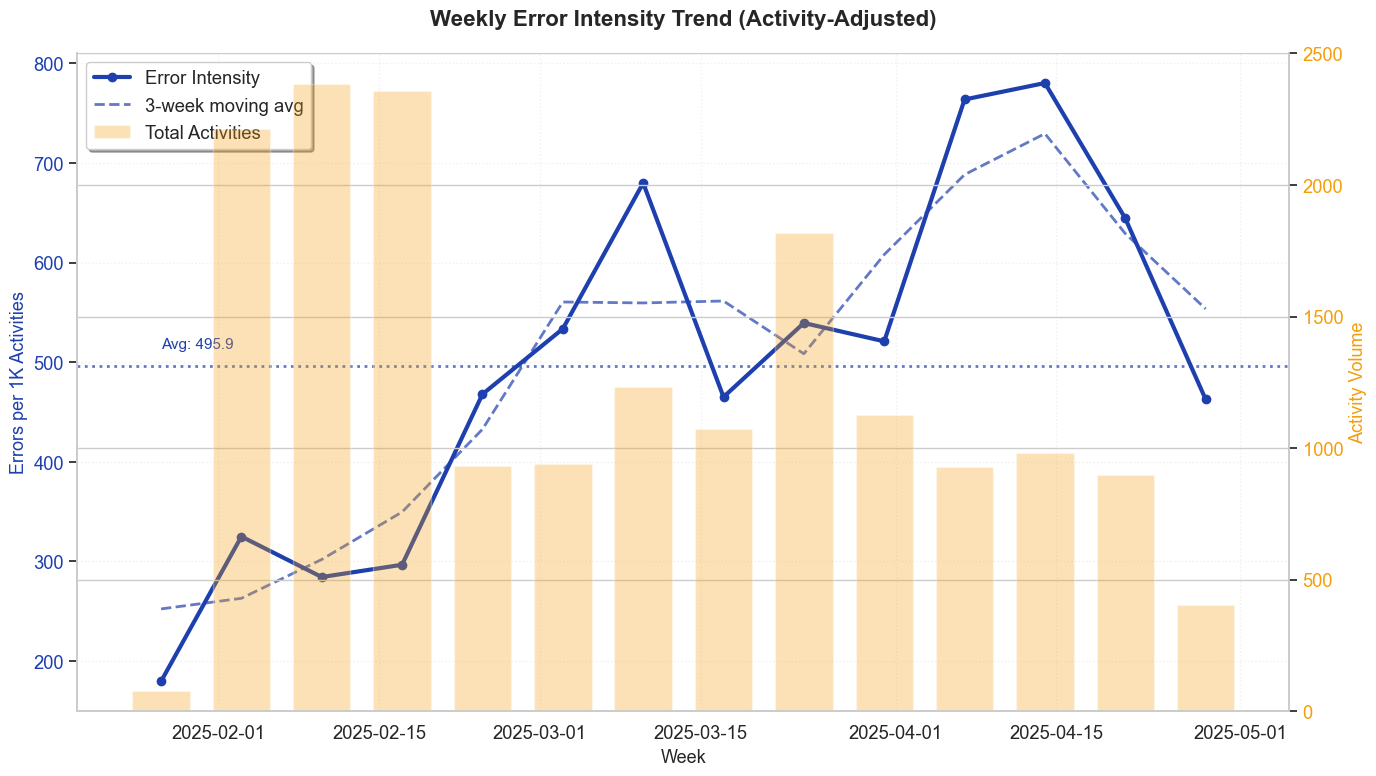

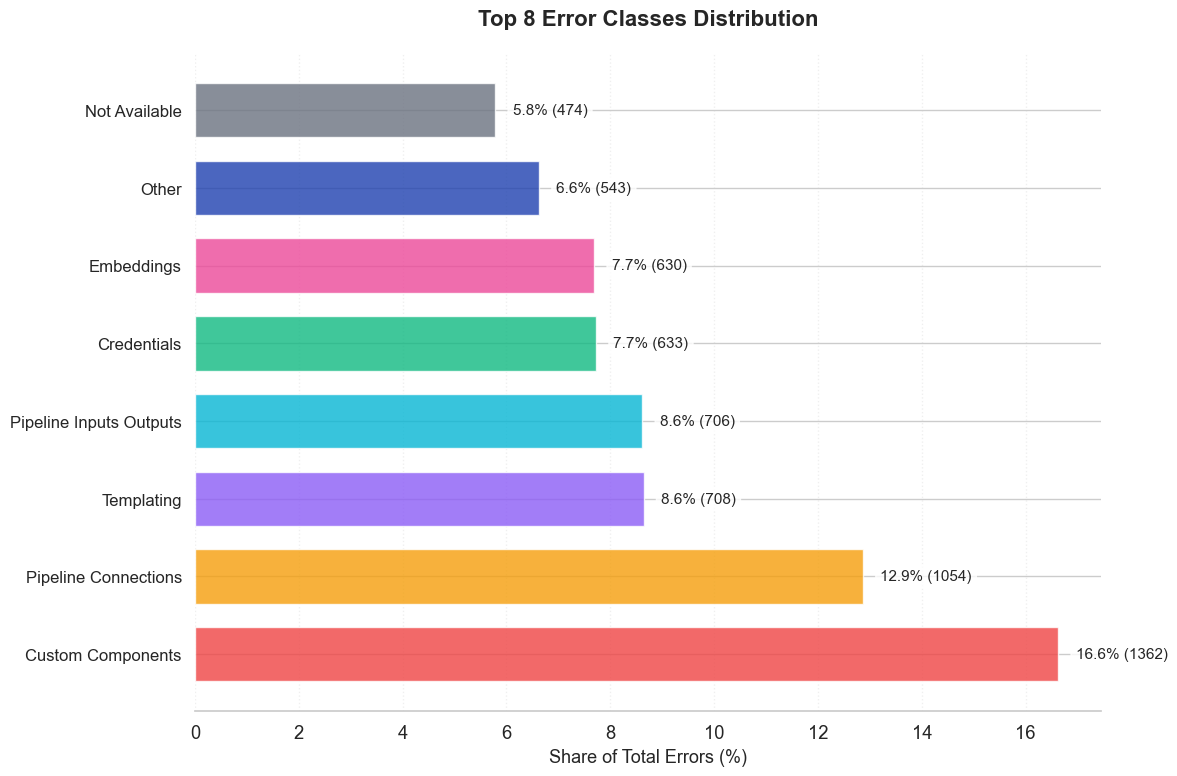

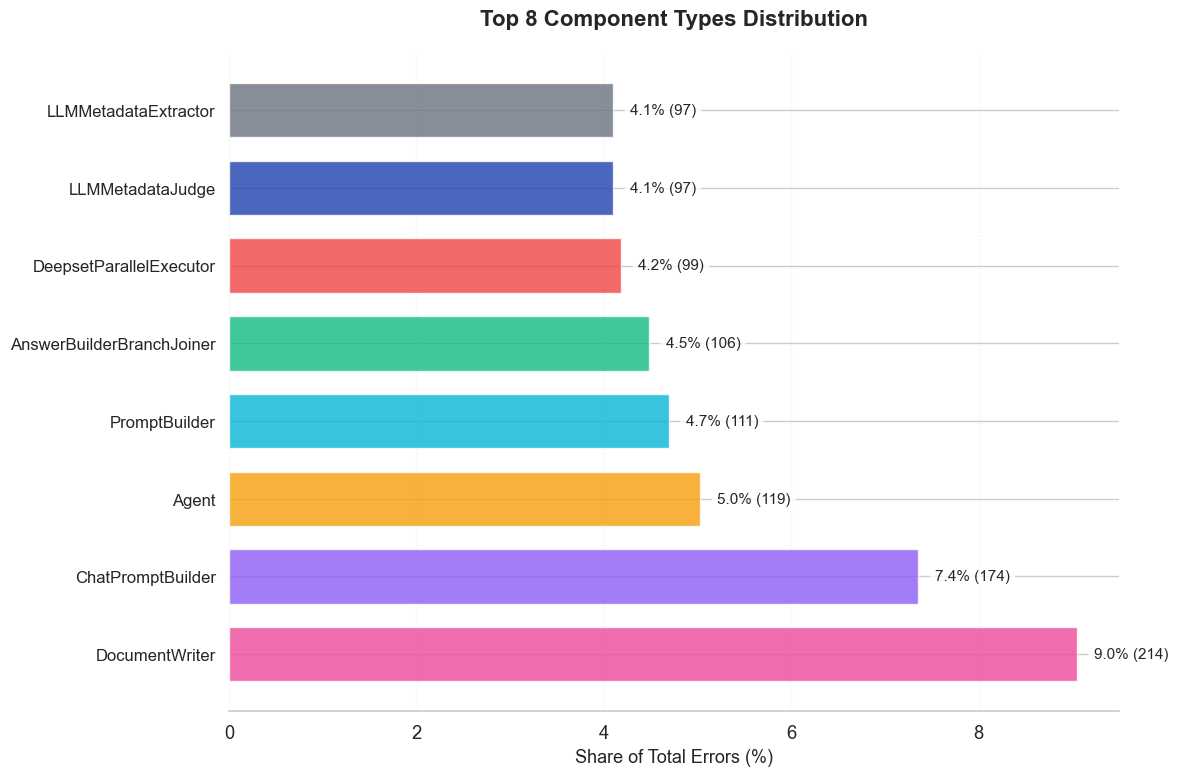

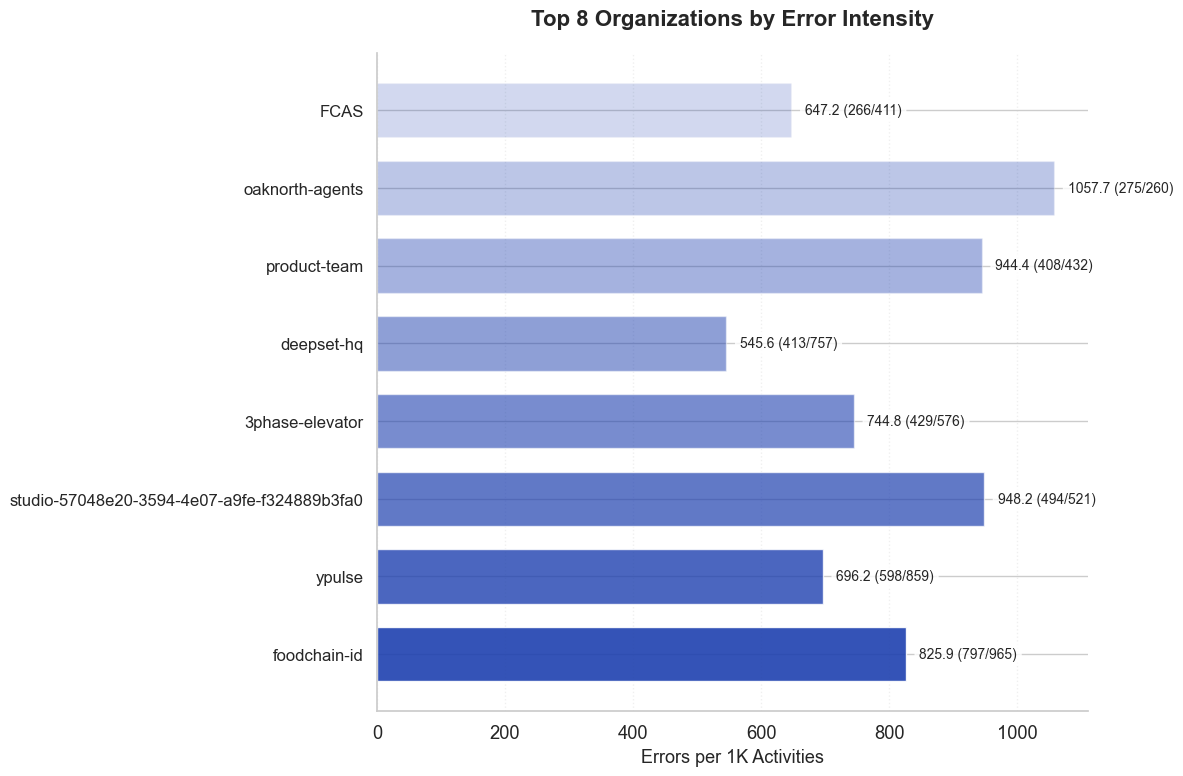

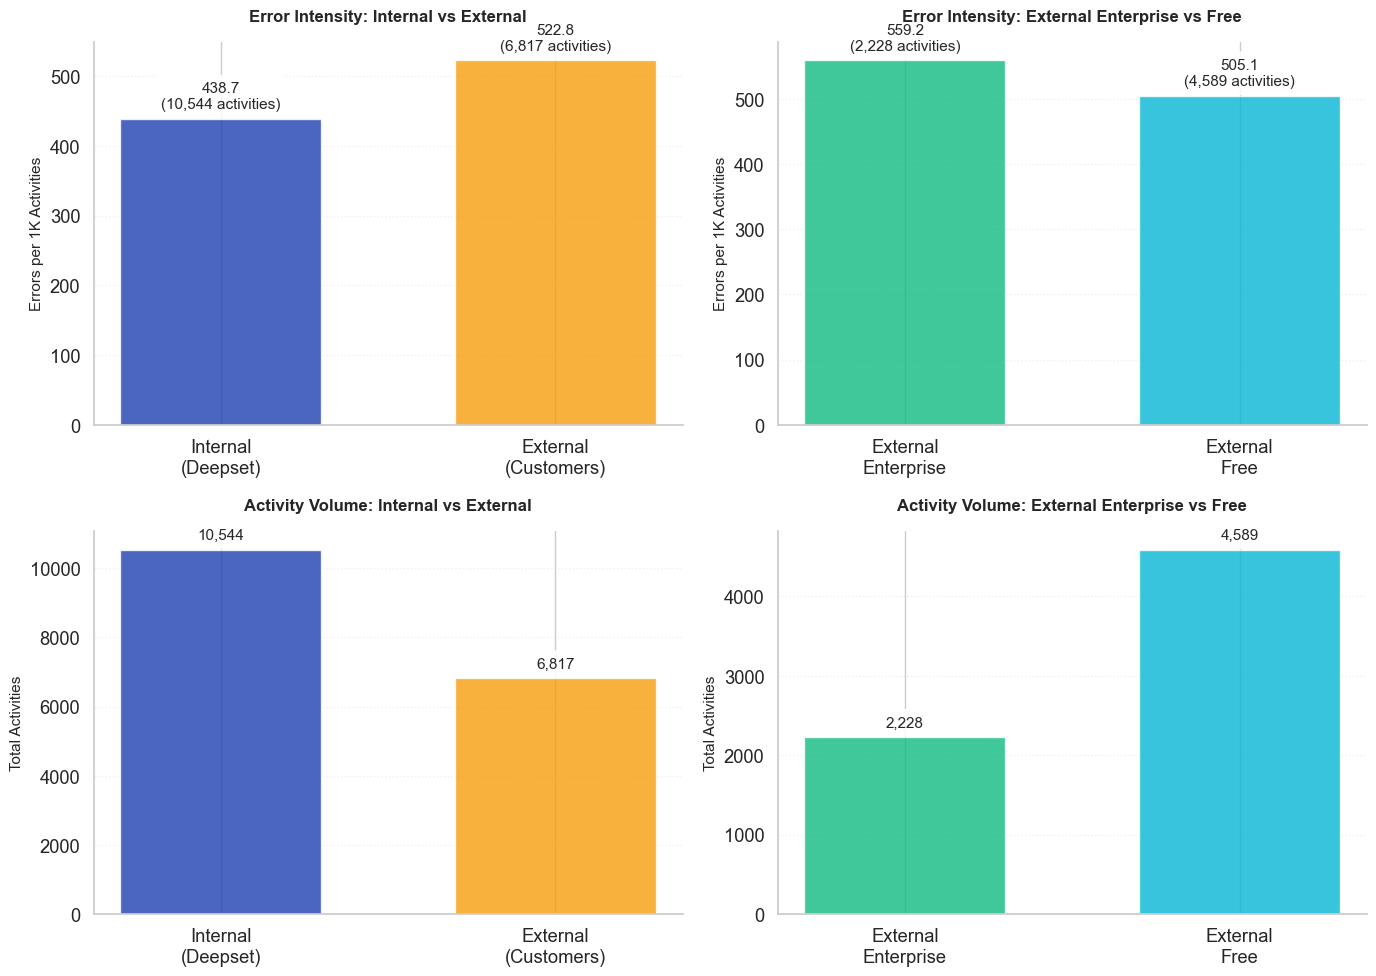

In [15]:

warnings.filterwarnings('ignore')

# Set consistent style for professional look
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_context("notebook", font_scale=1.2)

# Define consistent color palette - professional and accessible
COLORS = {
    'primary': '#1E40AF',      # Deep blue
    'secondary': '#F59E0B',    # Amber
    'success': '#10B981',      # Emerald
    'danger': '#EF4444',       # Red
    'purple': '#8B5CF6',       # Purple
    'pink': '#EC4899',         # Pink
    'cyan': '#06B6D4',         # Cyan
    'gray': '#6B7280'          # Gray
}

# ============================================
# LOAD YOUR DATA HERE
# ============================================
# DATA STRUCTURE ASSUMPTIONS:
# error_data: timestamp, error_class, component_type, is_deepset_user, organization_type, organization_name
# activity_data: timestamp, is_deepset_user, organization_type, organization_name (general activity indicator)

# Replace with your actual data:
error_data = df.copy()      # Your error events
activity_data = pd.read_csv("../../../../data/processed/created_updated_deployed_events.csv")   # Your general activity events
# Ensure both datasets have consistent timestamp column
error_data['timestamp'] = pd.to_datetime(error_data['event_timestamp'])
activity_data['timestamp'] = pd.to_datetime(activity_data['event_timestamp'])

# ============================================
# ACTIVITY-ADJUSTED ERROR ANALYSIS FUNCTIONS
# ============================================

def calculate_activity_adjusted_metrics(error_df, activity_df, group_by_cols):
    """
    Calculate activity-adjusted error metrics by grouping both datasets
    Returns errors per 1000 activity events for normalization
    Only use this for segments that can have different activity levels (time, orgs, user types)
    """
    error_counts = error_df.groupby(group_by_cols).size().reset_index(name='error_count')
    activity_counts = activity_df.groupby(group_by_cols).size().reset_index(name='activity_count')

    # Merge to get both counts for each group
    merged = pd.merge(activity_counts, error_counts, on=group_by_cols, how='left')
    merged['error_count'] = merged['error_count'].fillna(0)

    # Calculate errors per 1000 activity events for easier interpretation
    merged['errors_per_1k_activity'] = (merged['error_count'] / merged['activity_count']) * 1000
    merged['activity_share'] = (merged['activity_count'] / merged['activity_count'].sum()) * 100

    return merged

# ============================================
# CALCULATE KEY METRICS
# ============================================

total_errors = len(error_data)
total_activity = len(activity_data)
overall_error_intensity = (total_errors / total_activity) * 1000  # errors per 1000 activities

date_range_start = min(error_data['timestamp'].min(), activity_data['timestamp'].min()).strftime('%B %d, %Y')
date_range_end = max(error_data['timestamp'].max(), activity_data['timestamp'].max()).strftime('%B %d, %Y')

# Weekly aggregation with activity adjustment
error_data['week'] = error_data['timestamp'].dt.to_period('W').dt.to_timestamp()
activity_data['week'] = activity_data['timestamp'].dt.to_period('W').dt.to_timestamp()

weekly_metrics = calculate_activity_adjusted_metrics(error_data, activity_data, ['week'])
weekly_metrics = weekly_metrics.sort_values('week')
avg_weekly_error_intensity = weekly_metrics['errors_per_1k_activity'].mean()

# Activity-adjusted metrics by different dimensions
org_metrics = calculate_activity_adjusted_metrics(error_data, activity_data, ['organization_name'])
org_metrics = org_metrics.sort_values('error_count', ascending=False)

# Error distribution by error-specific dimensions (no activity adjustment needed)
error_class_counts = error_data['error_class'].value_counts()
error_class_distribution = pd.DataFrame({
    'error_class': error_class_counts.index,
    'error_count': error_class_counts.values,
    'error_share': (error_class_counts.values / error_class_counts.sum()) * 100
})

component_counts = error_data['component_type'].value_counts()
component_distribution = pd.DataFrame({
    'component_type': component_counts.index,
    'error_count': component_counts.values,
    'error_share': (component_counts.values / component_counts.sum()) * 100
})

# User segmentation with activity adjustment
internal_errors = error_data['is_deepset_user'].sum()
internal_activity = activity_data['is_deepset_user'].sum()
external_errors = len(error_data) - internal_errors
external_activity = len(activity_data) - internal_activity

internal_intensity = (internal_errors / internal_activity) * 1000 if internal_activity > 0 else 0
external_intensity = (external_errors / external_activity) * 1000 if external_activity > 0 else 0

# Enterprise vs Free activity-adjusted metrics
enterprise_errors = (error_data['organization_type'] == 'FULL_DEEPSET_CLOUD').sum()
enterprise_activity = (activity_data['organization_type'] == 'FULL_DEEPSET_CLOUD').sum()
free_errors = (error_data['organization_type'] == 'DEEPSET_STUDIO_WITH_LIMITS').sum()
free_activity = (activity_data['organization_type'] == 'DEEPSET_STUDIO_WITH_LIMITS').sum()

enterprise_intensity = (enterprise_errors / enterprise_activity) * 1000 if enterprise_activity > 0 else 0
free_intensity = (free_errors / free_activity) * 1000 if free_activity > 0 else 0

# External Enterprise vs External Free activity-adjusted metrics
external_enterprise_errors = ((error_data['is_deepset_user'] == False) &
                             (error_data['organization_type'] == 'FULL_DEEPSET_CLOUD')).sum()
external_enterprise_activity = ((activity_data['is_deepset_user'] == False) &
                               (activity_data['organization_type'] == 'FULL_DEEPSET_CLOUD')).sum()
external_free_errors = ((error_data['is_deepset_user'] == False) &
                       (error_data['organization_type'] == 'DEEPSET_STUDIO_WITH_LIMITS')).sum()
external_free_activity = ((activity_data['is_deepset_user'] == False) &
                         (activity_data['organization_type'] == 'DEEPSET_STUDIO_WITH_LIMITS')).sum()

external_enterprise_intensity = (external_enterprise_errors / external_enterprise_activity) * 1000 if external_enterprise_activity > 0 else 0
external_free_intensity = (external_free_errors / external_free_activity) * 1000 if external_free_activity > 0 else 0

# ============================================
# PLOT 1: KEY METRICS SUMMARY
# ============================================
fig, axes = plt.subplots(2, 3, figsize=(15, 8), facecolor='white')
fig.suptitle('Activity-Adjusted Error Analysis - Key Metrics', fontsize=18, fontweight='bold', y=0.98)

axes = axes.flatten()

# Define metrics
metrics = [
    {'value': f'{overall_error_intensity:.1f}', 'label': 'Errors per 1K Activity', 'sublabel': f'{total_errors:,} errors / {total_activity:,} activities'},
    {'value': f'{avg_weekly_error_intensity:.1f}', 'label': 'Avg Weekly Intensity', 'sublabel': 'errors per 1K activities/week'},
    {'value': f'{error_class_distribution.iloc[0]["error_share"]:.1f}%',
     'label': 'Top Error Class Share', 'sublabel': error_class_distribution.iloc[0]['error_class'].replace('_', ' ').title()},
    {'value': f'{component_distribution.iloc[0]["error_share"]:.1f}%',
     'label': 'Top Component Share', 'sublabel': component_distribution.iloc[0]['component_type']},
    {'value': f'{external_intensity:.1f}', 'label': 'External User Intensity', 'sublabel': f'{external_errors:,} errors / {external_activity:,} activities'},
    {'value': f'{enterprise_intensity:.1f}', 'label': 'Enterprise Intensity', 'sublabel': f'{enterprise_errors:,} errors / {enterprise_activity:,} activities'}
]

# Create metric cards
for ax, metric, color in zip(axes, metrics, [COLORS['primary'], COLORS['secondary'],
                                             COLORS['danger'], COLORS['pink'],
                                             COLORS['success'], COLORS['cyan']]):
    ax.text(0.5, 0.5, metric['value'], ha='center', va='center',
            fontsize=32, fontweight='bold', color=color, transform=ax.transAxes)
    ax.text(0.5, 0.15, metric['label'], ha='center', va='center',
            fontsize=14, color=COLORS['gray'], transform=ax.transAxes)
    ax.text(0.5, 0.85, metric['sublabel'], ha='center', va='center',
            fontsize=11, color='#9CA3AF', transform=ax.transAxes)

    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.axis('off')

    # Add subtle border
    for spine in ['top', 'right', 'bottom', 'left']:
        ax.spines[spine].set_visible(True)
        ax.spines[spine].set_color('#E5E7EB')
        ax.spines[spine].set_linewidth(1)

plt.tight_layout()
plt.savefig('activity_adjusted_summary.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

# ============================================
# PLOT 2: WEEKLY ERROR INTENSITY TREND
# ============================================
fig, ax1 = plt.subplots(figsize=(14, 8), facecolor='white')

# Plot error intensity (primary y-axis)
color1 = COLORS['primary']
ax1.set_xlabel('Week', fontsize=13)
ax1.set_ylabel('Errors per 1K Activities', color=color1, fontsize=13)
line1 = ax1.plot(weekly_metrics['week'], weekly_metrics['errors_per_1k_activity'],
                color=color1, linewidth=3, marker='o', markersize=6,
                label='Error Intensity')
ax1.tick_params(axis='y', labelcolor=color1)
ax1.grid(True, alpha=0.3, linestyle=':')

# Add rolling average
weekly_metrics['intensity_rolling'] = weekly_metrics['errors_per_1k_activity'].rolling(window=3, center=True, min_periods=1).mean()
ax1.plot(weekly_metrics['week'], weekly_metrics['intensity_rolling'],
         color=color1, linewidth=2, linestyle='--', alpha=0.7,
         label='3-week moving avg')

# Add average line
ax1.axhline(y=avg_weekly_error_intensity, color=color1, linestyle=':', alpha=0.7, linewidth=2)
avg_text_y = avg_weekly_error_intensity + weekly_metrics['errors_per_1k_activity'].std()*0.1
ax1.text(weekly_metrics['week'].iloc[0], avg_text_y,
         f'Avg: {avg_weekly_error_intensity:.1f}', fontsize=11, color=color1,
         bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))

# Create secondary y-axis for activity volume
ax2 = ax1.twinx()
color2 = COLORS['secondary']
ax2.set_ylabel('Activity Volume', color=color2, fontsize=13)
bars = ax2.bar(weekly_metrics['week'], weekly_metrics['activity_count'],
               alpha=0.3, color=color2, label='Total Activities', width=5)
ax2.tick_params(axis='y', labelcolor=color2)

# Combine legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left',
           frameon=True, fancybox=True, shadow=True)

plt.title('Weekly Error Intensity Trend (Activity-Adjusted)', fontsize=16, fontweight='bold', pad=20)

ax1.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)

plt.tight_layout()
plt.savefig('weekly_error_intensity_trend.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

# ============================================
# PLOT 3: ERROR CLASS DISTRIBUTION
# ============================================
plt.figure(figsize=(12, 8), facecolor='white')

top_error_classes = error_class_distribution.head(8)
colors = [COLORS['danger'], COLORS['secondary'], COLORS['purple'], COLORS['cyan'],
          COLORS['success'], COLORS['pink'], COLORS['primary'], COLORS['gray']]

# Error share (percentage of all errors)
bars = plt.barh(range(8), top_error_classes['error_share'], color=colors, alpha=0.8, height=0.7)
plt.yticks(range(8), [err.replace('_', ' ').title() for err in top_error_classes['error_class']], fontsize=12)
plt.xlabel('Share of Total Errors (%)', fontsize=13)
plt.title('Top 8 Error Classes Distribution', fontsize=16, fontweight='bold', pad=20)
plt.grid(True, alpha=0.3, axis='x', linestyle=':')

for i, (bar, share, count) in enumerate(zip(bars, top_error_classes['error_share'],
                                           top_error_classes['error_count'])):
    plt.text(share + top_error_classes['error_share'].max()*0.02,
             bar.get_y() + bar.get_height()/2,
             f'{share:.1f}% ({count:.0f})', va='center', fontsize=11,
             bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.tight_layout()
plt.savefig('error_class_distribution.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

# ============================================
# PLOT 4: COMPONENT DISTRIBUTION
# ============================================
plt.figure(figsize=(12, 8), facecolor='white')

top_components = component_distribution.head(8)
colors = [COLORS['pink'], COLORS['purple'], COLORS['secondary'], COLORS['cyan'],
          COLORS['success'], COLORS['danger'], COLORS['primary'], COLORS['gray']]

# Component error share
bars = plt.barh(range(8), top_components['error_share'], color=colors, alpha=0.8, height=0.7)
plt.yticks(range(8), top_components['component_type'], fontsize=12)
plt.xlabel('Share of Total Errors (%)', fontsize=13)
plt.title('Top 8 Component Types Distribution', fontsize=16, fontweight='bold', pad=20)
plt.grid(True, alpha=0.3, axis='x', linestyle=':')

for i, (bar, share, count) in enumerate(zip(bars, top_components['error_share'],
                                           top_components['error_count'])):
    plt.text(share + top_components['error_share'].max()*0.02,
             bar.get_y() + bar.get_height()/2,
             f'{share:.1f}% ({count:.0f})', va='center', fontsize=11,
             bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.tight_layout()
plt.savefig('component_error_distribution.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

# ============================================
# PLOT 5: ORGANIZATION ANALYSIS
# ============================================
plt.figure(figsize=(12, 8), facecolor='white')

top_orgs = org_metrics.head(8)

# Organization error intensity
bars = plt.barh(range(8), top_orgs['errors_per_1k_activity'], color=COLORS['primary'], alpha=0.8, height=0.7)
for i, bar in enumerate(bars):
    bar.set_alpha(0.9 - i*0.1)

plt.yticks(range(8), top_orgs['organization_name'], fontsize=12)
plt.xlabel('Errors per 1K Activities', fontsize=13)
plt.title('Top 8 Organizations by Error Intensity', fontsize=16, fontweight='bold', pad=20)
plt.grid(True, alpha=0.3, axis='x', linestyle=':')

for i, (bar, intensity, errors, activities) in enumerate(zip(bars, top_orgs['errors_per_1k_activity'],
                                                            top_orgs['error_count'], top_orgs['activity_count'])):
    plt.text(intensity + top_orgs['errors_per_1k_activity'].max()*0.02,
             bar.get_y() + bar.get_height()/2,
             f'{intensity:.1f} ({errors:.0f}/{activities:.0f})', va='center', fontsize=10,
             bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig('organization_intensity_analysis.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

# ============================================
# PLOT 6: USER SEGMENT COMPARISON
# ============================================
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 10), facecolor='white')

# Internal vs External Error Intensity
categories1 = ['Internal\n(Deepset)', 'External\n(Customers)']
intensities1 = [internal_intensity, external_intensity]
activity_counts1 = [internal_activity, external_activity]
colors1 = [COLORS['primary'], COLORS['secondary']]

bars1 = ax1.bar(categories1, intensities1, color=colors1, alpha=0.8, width=0.6)
for bar, intensity, activities in zip(bars1, intensities1, activity_counts1):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + max(intensities1)*0.02,
            f'{intensity:.1f}\n({activities:,} activities)', ha='center', va='bottom', fontsize=11,
            bbox=dict(boxstyle='round,pad=0.4', facecolor='white', alpha=0.9))

ax1.set_title('Error Intensity: Internal vs External', fontsize=12, fontweight='bold', pad=15)
ax1.set_ylabel('Errors per 1K Activities', fontsize=11)
ax1.grid(True, alpha=0.3, axis='y', linestyle=':')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# External Enterprise vs External Free Error Intensity
categories2 = ['External\nEnterprise', 'External\nFree']
intensities2 = [external_enterprise_intensity, external_free_intensity]
activity_counts2 = [external_enterprise_activity, external_free_activity]
colors2 = [COLORS['success'], COLORS['cyan']]

bars2 = ax2.bar(categories2, intensities2, color=colors2, alpha=0.8, width=0.6)
for bar, intensity, activities in zip(bars2, intensities2, activity_counts2):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + max(intensities2)*0.02,
            f'{intensity:.1f}\n({activities:,} activities)', ha='center', va='bottom', fontsize=11,
            bbox=dict(boxstyle='round,pad=0.4', facecolor='white', alpha=0.9))

ax2.set_title('Error Intensity: External Enterprise vs Free', fontsize=12, fontweight='bold', pad=15)
ax2.set_ylabel('Errors per 1K Activities', fontsize=11)
ax2.grid(True, alpha=0.3, axis='y', linestyle=':')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

# Activity Distribution - Internal vs External
bars3 = ax3.bar(categories1, activity_counts1, color=colors1, alpha=0.8, width=0.6)
for bar, count in zip(bars3, activity_counts1):
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height + max(activity_counts1)*0.02,
            f'{count:,}', ha='center', va='bottom', fontsize=11,
            bbox=dict(boxstyle='round,pad=0.4', facecolor='white', alpha=0.9))

ax3.set_title('Activity Volume: Internal vs External', fontsize=12, fontweight='bold', pad=15)
ax3.set_ylabel('Total Activities', fontsize=11)
ax3.grid(True, alpha=0.3, axis='y', linestyle=':')
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)

# Activity Distribution - External Enterprise vs External Free
bars4 = ax4.bar(categories2, activity_counts2, color=colors2, alpha=0.8, width=0.6)
for bar, count in zip(bars4, activity_counts2):
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height + max(activity_counts2)*0.02,
            f'{count:,}', ha='center', va='bottom', fontsize=11,
            bbox=dict(boxstyle='round,pad=0.4', facecolor='white', alpha=0.9))

ax4.set_title('Activity Volume: External Enterprise vs Free', fontsize=12, fontweight='bold', pad=15)
ax4.set_ylabel('Total Activities', fontsize=11)
ax4.grid(True, alpha=0.3, axis='y', linestyle=':')
ax4.spines['top'].set_visible(False)
ax4.spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig('user_segment_intensity_comparison.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

ERROR DISTRIBUTION ANALYSIS BY USER SEGMENTS

1. ERROR CLASSES: INTERNAL vs EXTERNAL USERS
------------------------------------------------------------


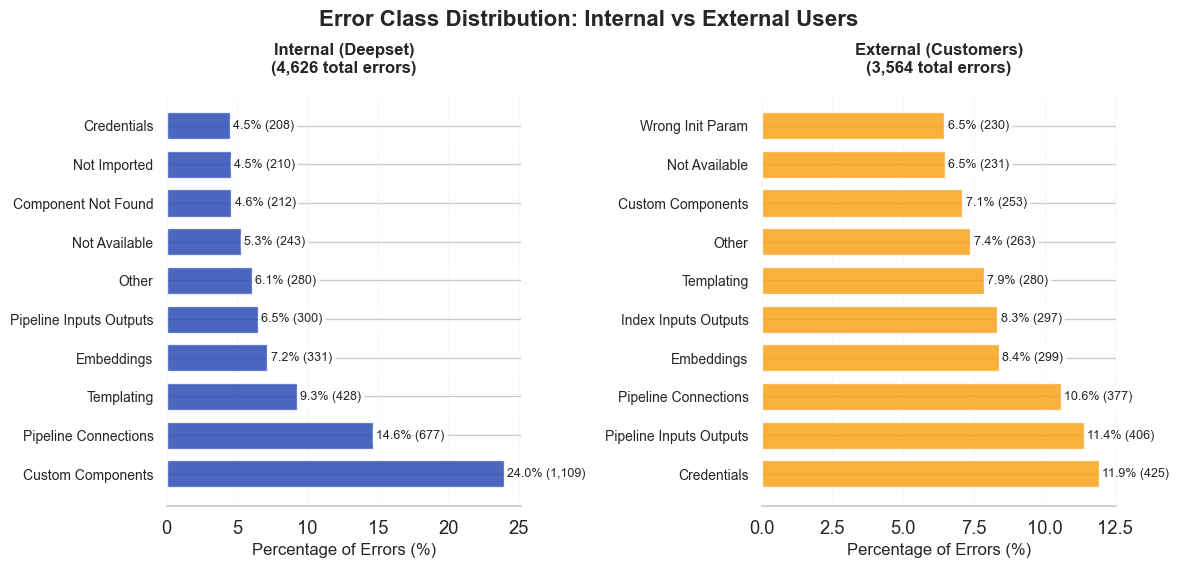

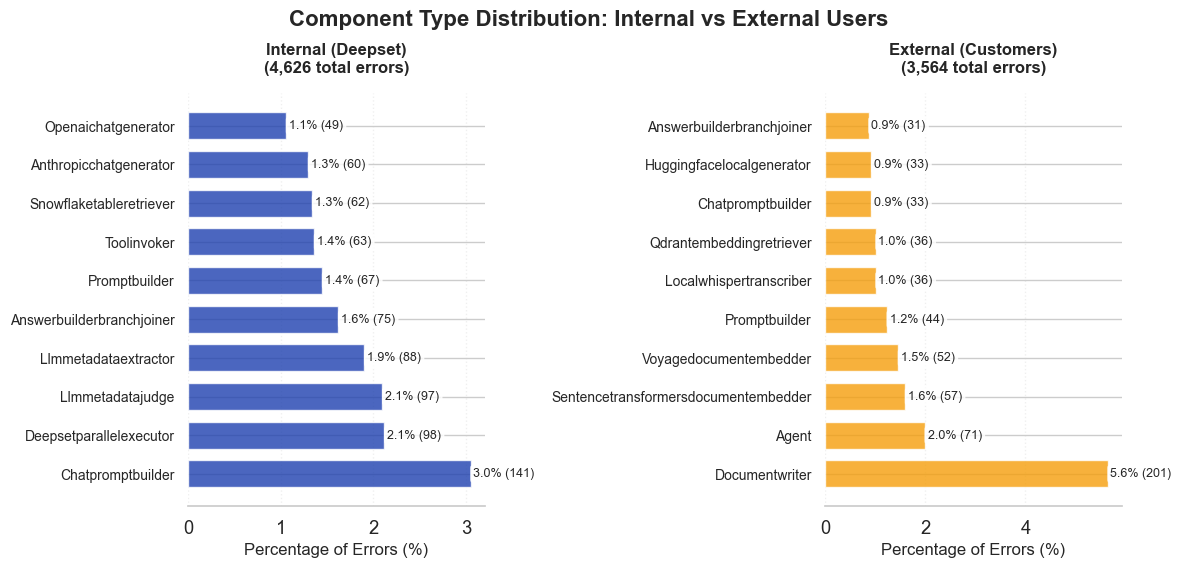



3. ERROR CLASSES: ENTERPRISE vs FREE USERS
------------------------------------------------------------


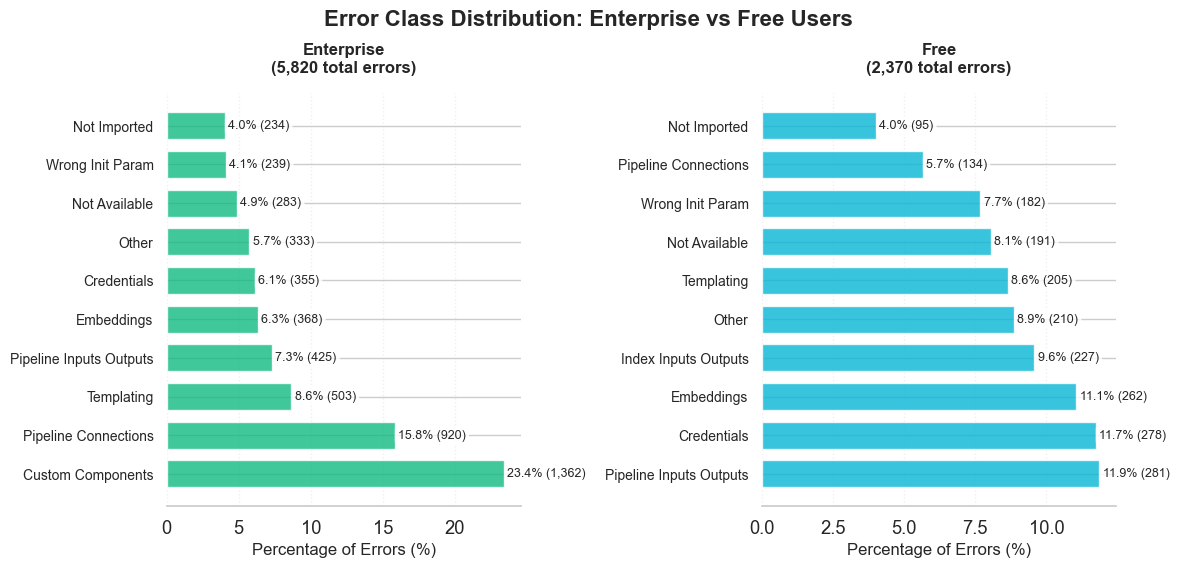

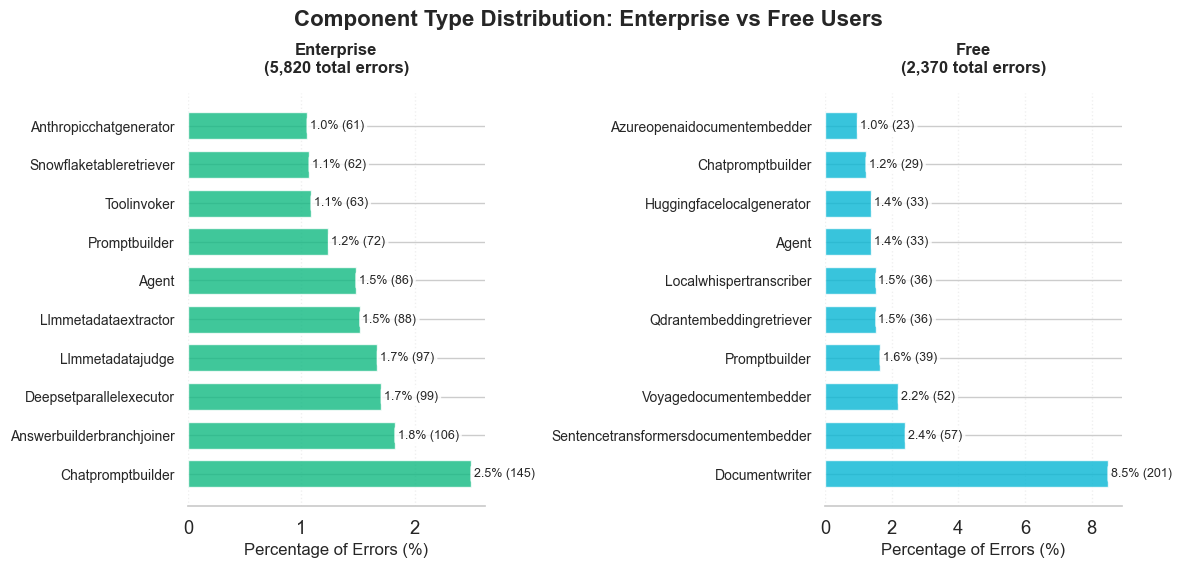



5. ERROR CLASSES: EXTERNAL ENTERPRISE vs EXTERNAL FREE
------------------------------------------------------------


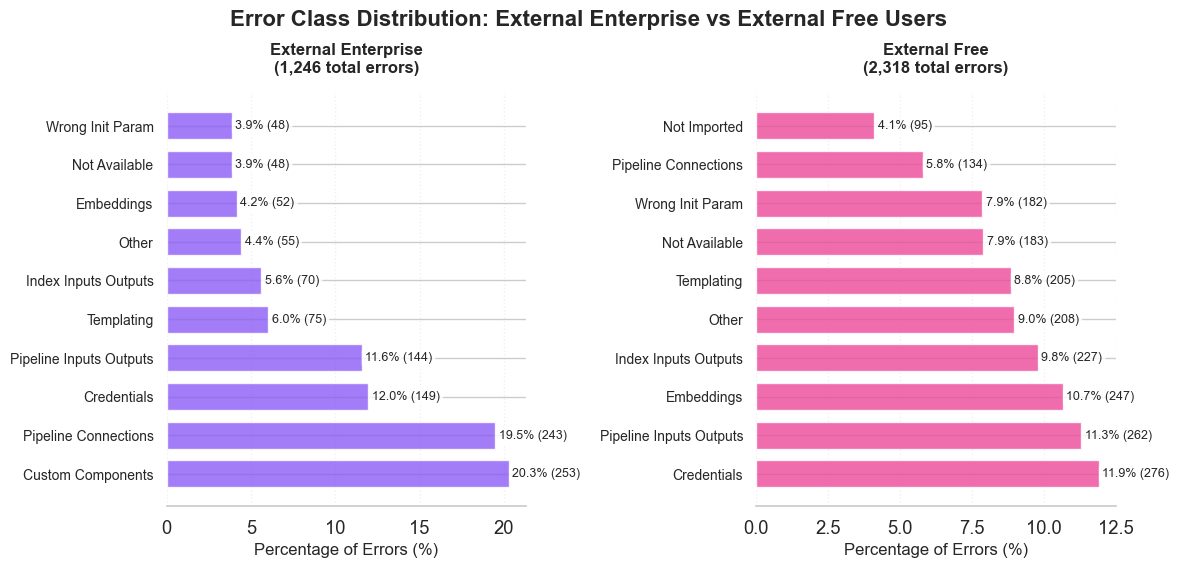

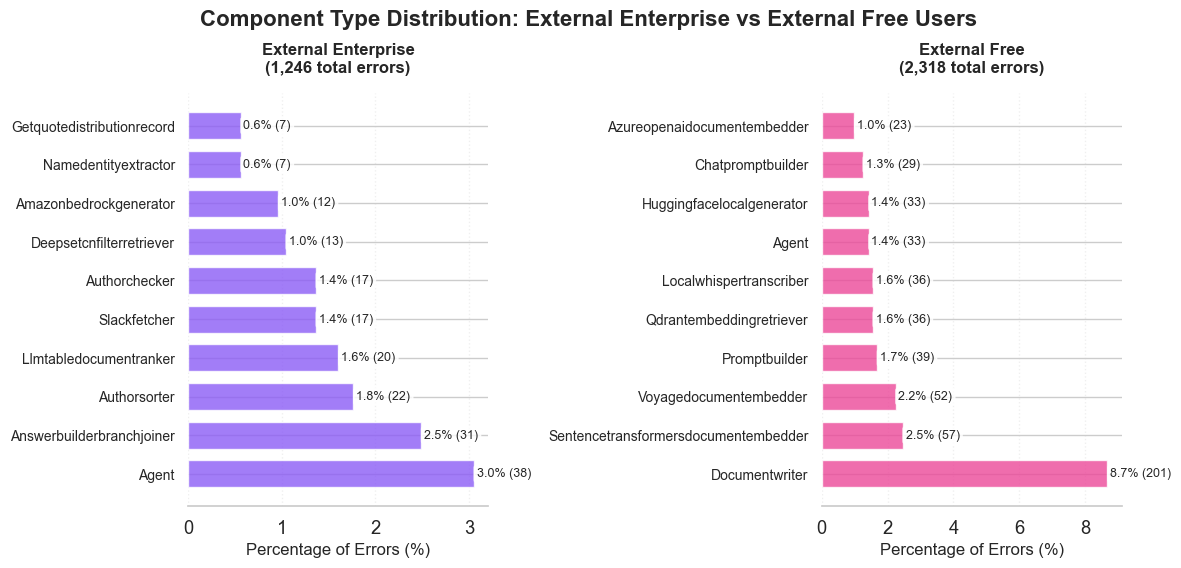

In [16]:
# ============================================
# SEGMENT ANALYSIS FUNCTIONS
# ============================================

def analyze_error_distribution_by_segment(df, segment_col, segment_values, segment_labels, error_type_col, top_n=10):
    """
    Analyze error type distribution across user segments
    """
    results = {}

    for segment_val, segment_label in zip(segment_values, segment_labels):
        if segment_col == 'user_type':
            # Special handling for internal vs external
            if segment_val == 'internal':
                segment_df = df[df['is_deepset_user'] == True]
            else:
                segment_df = df[df['is_deepset_user'] == False]
        else:
            segment_df = df[df[segment_col] == segment_val]

        # Get error type distribution
        error_counts = segment_df[error_type_col].value_counts().head(top_n)
        total_errors = len(segment_df)

        results[segment_label] = {
            'counts': error_counts,
            'percentages': (error_counts / total_errors * 100),
            'total_errors': total_errors
        }

    return results

def create_comparison_plot(results, title, error_type_name, segment_labels, colors, filename):
    """
    Create side-by-side comparison plots for error distributions (percentages only)
    """
    fig, axes = plt.subplots(1, len(segment_labels), figsize=(6*len(segment_labels), 6), facecolor='white')
    fig.suptitle(title, fontsize=16, fontweight='bold', y=0.95)

    # Handle single subplot case
    if len(segment_labels) == 1:
        axes = [axes]

    # Percentages within each segment
    for i, (segment_label, color) in enumerate(zip(segment_labels, colors)):
        ax = axes[i]
        data = results[segment_label]['percentages']
        counts_data = results[segment_label]['counts']

        bars = ax.barh(range(len(data)), data.values, color=color, alpha=0.8, height=0.7)
        ax.set_yticks(range(len(data)))
        ax.set_yticklabels([str(x).replace('_', ' ').title() if isinstance(x, str) else str(x)
                           for x in data.index], fontsize=10)
        ax.set_xlabel('Percentage of Errors (%)', fontsize=12)
        ax.set_title(f'{segment_label}\n({results[segment_label]["total_errors"]:,} total errors)',
                    fontsize=12, fontweight='bold', pad=15)
        ax.grid(True, alpha=0.3, axis='x', linestyle=':')

        # Add percentage and absolute count labels
        for bar, pct, error_type in zip(bars, data.values, data.index):
            count = counts_data[error_type]
            ax.text(pct + data.max()*0.01, bar.get_y() + bar.get_height()/2,
                   f'{pct:.1f}% ({count:,})', va='center', fontsize=9,
                   bbox=dict(boxstyle='round,pad=0.2', facecolor='white', alpha=0.8))

        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_visible(False)

    plt.tight_layout()
    plt.savefig(filename, dpi=300, bbox_inches='tight', facecolor='white')
    plt.show()

# ============================================
# ANALYSIS 1: INTERNAL VS EXTERNAL USERS
# ============================================
print("="*80)
print("ERROR DISTRIBUTION ANALYSIS BY USER SEGMENTS")
print("="*80)

# Error Classes: Internal vs External
print("\n1. ERROR CLASSES: INTERNAL vs EXTERNAL USERS")
print("-" * 60)

error_class_internal_external = analyze_error_distribution_by_segment(
    error_data, 'user_type', ['internal', 'external'],
    ['Internal (Deepset)', 'External (Customers)'], 'error_class', top_n=10
)

create_comparison_plot(
    error_class_internal_external,
    'Error Class Distribution: Internal vs External Users',
    'Error Class',
    ['Internal (Deepset)', 'External (Customers)'],
    [COLORS['primary'], COLORS['secondary']],
    'error_classes_internal_vs_external.png'
)

component_internal_external = analyze_error_distribution_by_segment(
    error_data, 'user_type', ['internal', 'external'],
    ['Internal (Deepset)', 'External (Customers)'], 'component_type', top_n=10
)

create_comparison_plot(
    component_internal_external,
    'Component Type Distribution: Internal vs External Users',
    'Component Type',
    ['Internal (Deepset)', 'External (Customers)'],
    [COLORS['primary'], COLORS['secondary']],
    'component_types_internal_vs_external.png'
)


# ============================================
# ANALYSIS 2: ENTERPRISE VS FREE USERS
# ============================================
print(f"\n\n3. ERROR CLASSES: ENTERPRISE vs FREE USERS")
print("-" * 60)

error_class_enterprise_free = analyze_error_distribution_by_segment(
    error_data, 'organization_type',
    ['FULL_DEEPSET_CLOUD', 'DEEPSET_STUDIO_WITH_LIMITS'],
    ['Enterprise', 'Free'], 'error_class', top_n=10
)

create_comparison_plot(
    error_class_enterprise_free,
    'Error Class Distribution: Enterprise vs Free Users',
    'Error Class',
    ['Enterprise', 'Free'],
    [COLORS['success'], COLORS['cyan']],
    'error_classes_enterprise_vs_free.png'
)


component_enterprise_free = analyze_error_distribution_by_segment(
    error_data, 'organization_type',
    ['FULL_DEEPSET_CLOUD', 'DEEPSET_STUDIO_WITH_LIMITS'],
    ['Enterprise', 'Free'], 'component_type', top_n=10
)

create_comparison_plot(
    component_enterprise_free,
    'Component Type Distribution: Enterprise vs Free Users',
    'Component Type',
    ['Enterprise', 'Free'],
    [COLORS['success'], COLORS['cyan']],
    'component_types_enterprise_vs_free.png'
)


# ============================================
# ANALYSIS 3: EXTERNAL ENTERPRISE vs EXTERNAL FREE
# ============================================
print(f"\n\n5. ERROR CLASSES: EXTERNAL ENTERPRISE vs EXTERNAL FREE")
print("-" * 60)

# Filter for external users only
external_users = error_data[error_data['is_deepset_user'] == False]

error_class_external_segments = analyze_error_distribution_by_segment(
    external_users, 'organization_type',
    ['FULL_DEEPSET_CLOUD', 'DEEPSET_STUDIO_WITH_LIMITS'],
    ['External Enterprise', 'External Free'], 'error_class', top_n=10
)

create_comparison_plot(
    error_class_external_segments,
    'Error Class Distribution: External Enterprise vs External Free Users',
    'Error Class',
    ['External Enterprise', 'External Free'],
    [COLORS['purple'], COLORS['pink']],
    'error_classes_external_enterprise_vs_free.png'
)

component_external_segments = analyze_error_distribution_by_segment(
    external_users, 'organization_type',
    ['FULL_DEEPSET_CLOUD', 'DEEPSET_STUDIO_WITH_LIMITS'],
    ['External Enterprise', 'External Free'], 'component_type', top_n=10
)

create_comparison_plot(
    component_external_segments,
    'Component Type Distribution: External Enterprise vs External Free Users',
    'Component Type',
    ['External Enterprise', 'External Free'],
    [COLORS['purple'], COLORS['pink']],
    'component_types_external_enterprise_vs_free.png'
)
